In [1]:
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt


2025-05-31 23:04:40.590604: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 23:04:40.713891: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-31 23:04:40.718910: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-31 23:04:44.344064: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Invalid MIT-MAGIC-COOKIE-1 key

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

In [3]:
clothes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


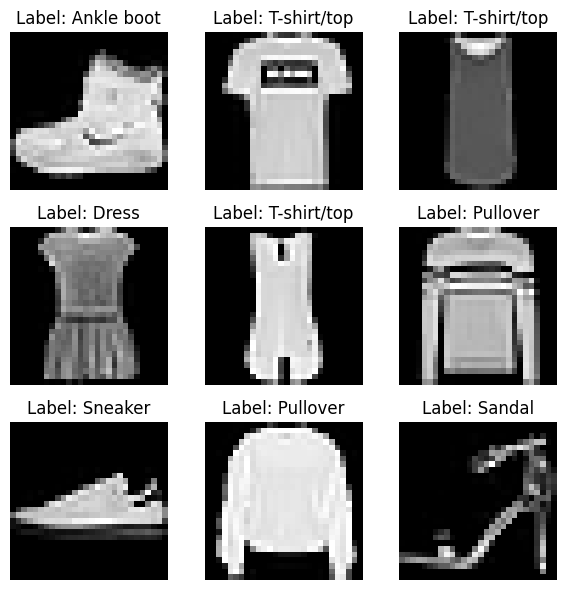

In [4]:
#

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {clothes_names[np.argmax(y_train[i])]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [5]:
# Define the Keras Tuner HyperModel
class ANNHyperModel(kt.HyperModel):
    def build(self, hp):
        model = Sequential([
            Flatten(input_shape=(28, 28)),
            Dense(hp.Int("neurons", min_value=128, max_value=512, step=128), activation=hp.Choice("activation", ["relu"])),
            Dropout(hp.Float("dropout_rate", 0.0, 0.5)),
            Dense(hp.Int("neurons_2", min_value=64, max_value=256, step=64), activation=hp.Choice("activation_2", ["relu"])),
            Dropout(hp.Float("dropout_rate_2", 0.0, 0.5)),
            Dense(10, activation="softmax")
        ])
        model.compile(optimizer=hp.Choice("optimizer", ["adam"]),
                      loss="categorical_crossentropy",
                      metrics=["accuracy"])
        return model

In [6]:
%%time 

tuner = kt.RandomSearch(
    ANNHyperModel(),
    objective="val_accuracy",
    max_trials=10,
    executions_per_trial=1
)

# Start hyperparameter tuning
tuner.search(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Print best hyperparameters
best_hyperparams = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hyperparams.values)

# Train best model using the best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparams)
best_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate on test set
loss, acc = best_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc * 100:.2f}%")


Trial 10 Complete [00h 01m 29s]
val_accuracy: 0.8445000052452087

Best val_accuracy So Far: 0.8898333311080933
Total elapsed time: 00h 23m 14s
Best hyperparameters: {'neurons': 384, 'activation': 'tanh', 'dropout_rate': 0.03126570101554266, 'neurons_2': 256, 'activation_2': 'tanh', 'dropout_rate_2': 0.24700397893013032, 'neurons_3': 64, 'activation_3': 'relu', 'dropout_rate_3': 0.38744721232133483, 'optimizer': 'adam'}
Epoch 1/10
750/750 [==============================] - 20s 25ms/step - loss: 0.5356 - accuracy: 0.8069 - val_loss: 0.4590 - val_accuracy: 0.8316
Epoch 2/10
750/750 [==============================] - 18s 24ms/step - loss: 0.4166 - accuracy: 0.8484 - val_loss: 0.3615 - val_accuracy: 0.8679
Epoch 3/10
750/750 [==============================] - 19s 25ms/step - loss: 0.3712 - accuracy: 0.8638 - val_loss: 0.3644 - val_accuracy: 0.8666
Epoch 4/10
750/750 [==============================] - 19s 25ms/step - loss: 0.3507 - accuracy: 0.8701 - val_loss: 0.3411 - val_accuracy: 0.8763
E

In [7]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 3s 8ms/step - loss: 0.3570 - accuracy: 0.8693

Test accuracy: 0.8693


In [8]:
y_pred = best_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 2s 6ms/step


# Evaluation

Epoch 1/10
750/750 [==============================] - 20s 24ms/step - loss: 0.5345 - accuracy: 0.8072 - val_loss: 0.4474 - val_accuracy: 0.8389
Epoch 2/10
750/750 [==============================] - 19s 25ms/step - loss: 0.4142 - accuracy: 0.8491 - val_loss: 0.3906 - val_accuracy: 0.8563
Epoch 3/10
750/750 [==============================] - 18s 24ms/step - loss: 0.3724 - accuracy: 0.8627 - val_loss: 0.3524 - val_accuracy: 0.8704
Epoch 4/10
750/750 [==============================] - 13s 17ms/step - loss: 0.3490 - accuracy: 0.8726 - val_loss: 0.3671 - val_accuracy: 0.8665
Epoch 5/10
750/750 [==============================] - 19s 25ms/step - loss: 0.3323 - accuracy: 0.8770 - val_loss: 0.3483 - val_accuracy: 0.8698
Epoch 6/10
750/750 [==============================] - 21s 27ms/step - loss: 0.3181 - accuracy: 0.8827 - val_loss: 0.3490 - val_accuracy: 0.8709
Epoch 7/10
750/750 [==============================] - 19s 25ms/step - loss: 0.3074 - accuracy: 0.8851 - val_loss: 0.3285 - val_accuracy:

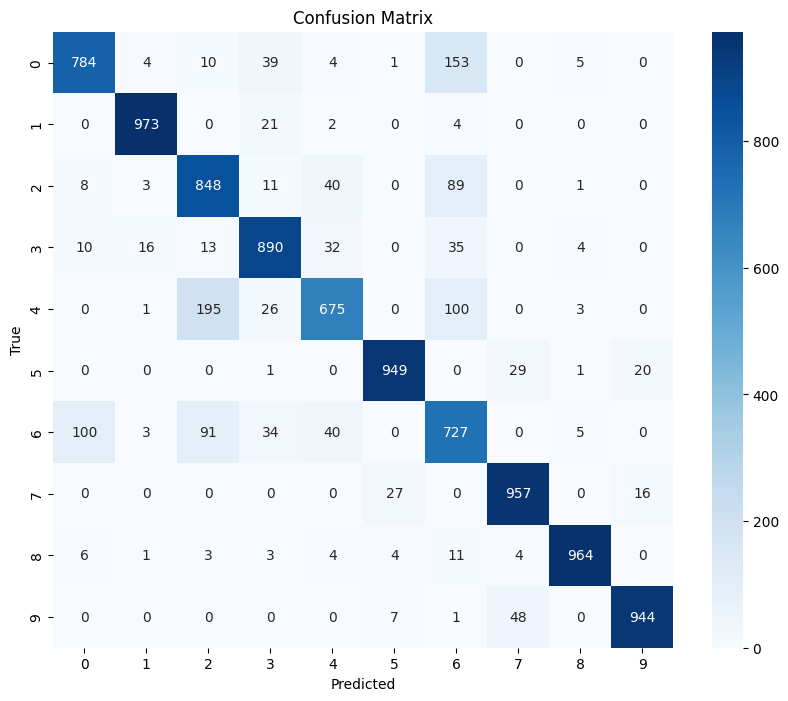

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Build and train the best model using best hyperparameters
best_model = tuner.hypermodel.build(best_hyperparams)
best_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Predict on test data
y_pred_prob = best_model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [10]:
print(y_pred_classes.shape)
print(y_test.shape)


(10000,)
(10000, 10)


# Actual Vs Predicted

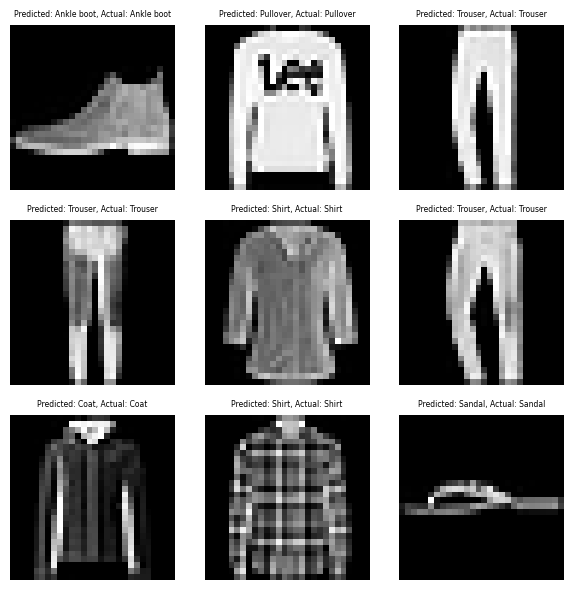

In [11]:

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {clothes_names[y_pred_classes[i]]}, Actual: {clothes_names[np.argmax(y_test[i])]}",
          fontsize=5.5)


    plt.axis('off')
plt.tight_layout()
plt.show()